# **Spam Mail Prediction**

Nama : Bintang Hadi (2155201048)

## Step 1 : Mengimport Modul dan Dataset

In [1]:
import nltk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Memuat data dari file csv ke pandas Dataframe
raw_mail_data = pd.read_csv('/content/drive/MyDrive/DATA SET/email_data.csv')

Menukar null value menjadi null string

In [4]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [5]:
# Memeriksa jumlah baris dan kolom pada dataframe
mail_data.shape

(5572, 2)

In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Step 2 : EDA (*Exploratory Data Analysis*)

In [7]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
# Jumlah mail berdasarkan kategori
mail_data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

<Axes: xlabel='Category'>

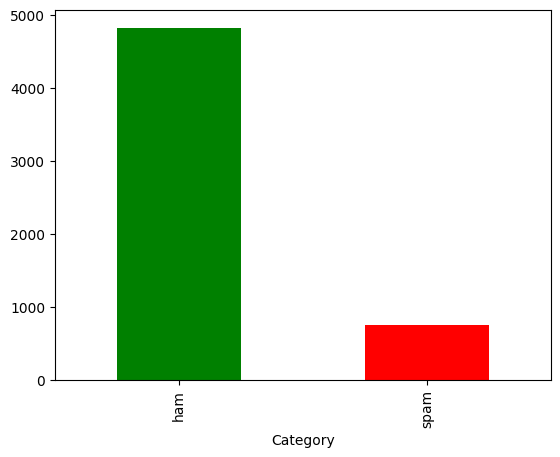

In [9]:
# Menampilkan grafik jumlah mail berdasarkan kategori
mail_data_value_counts = mail_data['Category'].value_counts()
mail_data_value_counts

mail_data_value_counts.plot.bar(color=['green', 'red'])

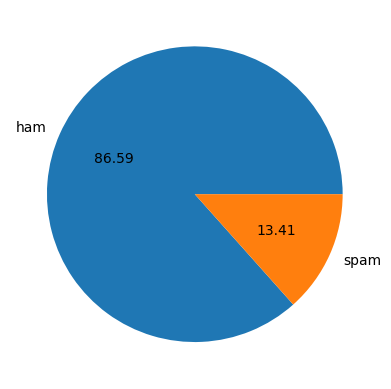

In [10]:
# Menampilkan persentase ham mail dan spam mail
plt.pie(mail_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

### Label Encoding

In [11]:
# Mengonversi Category menjadi Variabel Numerik
# Ham diberi angka 0 sedangkan Spam diberi Angka 1
mail_data['category_num'] = mail_data.Category.map({'ham':0, 'spam':1})
mail_data.head()

,Category,Message,category_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
# Menambahkan variabel panjang karakter tiap pesan pada dataframe
mail_data['message_len'] = mail_data.Message.apply(len)
mail_data.head()

,Category,Message,category_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

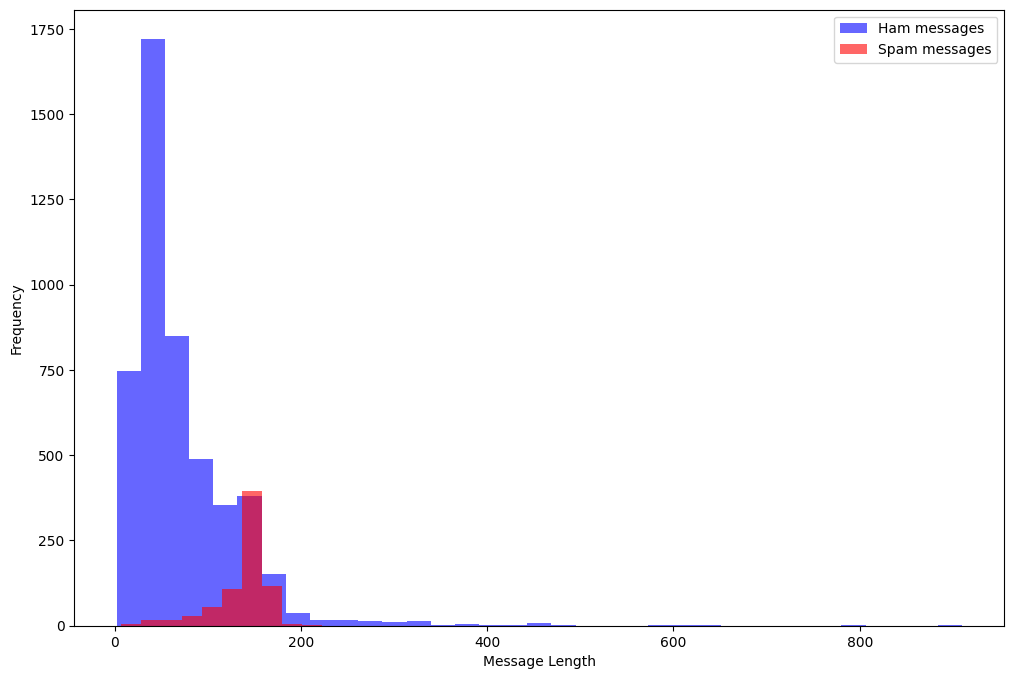

In [13]:
# Melakukan visualisasi panjang dan frekuensi pesan email
plt.figure (figsize=(12, 8))

mail_data[mail_data.Category=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
mail_data[mail_data.Category=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

## Step 3 : *Text Pre-processing*

In [14]:
import string
from nltk.corpus import stopwords # untuk menghilangkan tanda baca

def text_process(mess):
    """
    Mengambil string teks, lalu melakukan hal berikut:
     1. Hapus semua tanda baca
     2. Hapus semua stopwords
     3. Mengembalikan daftar teks yang dibersihkan

    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Memeriksa karakter tanda baca
    nopunc = [char for char in mess if char not in string.punctuation]

    # Menggabungkan semua karakter kembali menjadi bentuk string
    nopunc = ''.join(nopunc)

    # Menghilangkan stopword
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [15]:
mail_data.head()

,Category,Message,category_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


## Step 4 : Tokenisasi

In [16]:
# Mendownload package stopword
nltk.download('stopwords')

# Mengaplikasikan Fungsi text_process
mail_data['clean_msg'] = mail_data.Message.apply(text_process)
mail_data['clean_msg'] = mail_data['clean_msg'].apply(str.lower)

# Menampilkan dataframe dengan variabel pesan yang sudah bersih
mail_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message,category_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goes usf lives around though


### Membuat Word Cloud

In [17]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

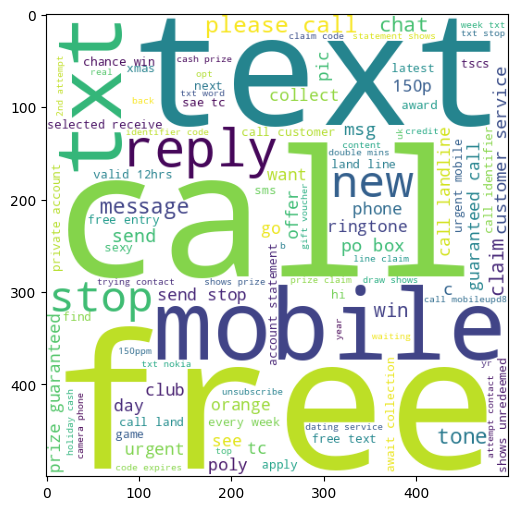

In [18]:
# Menampilkan Word Cloud untuk Pesan Spam
spam_wc = wc.generate(mail_data[mail_data['category_num'] == 1]['clean_msg'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

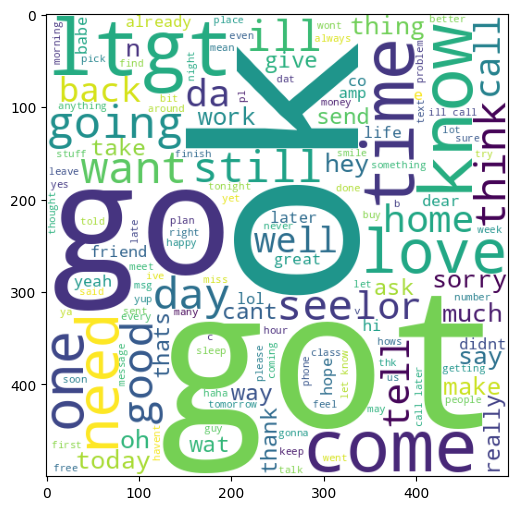

In [19]:
# Menampilkan Word Cloud untuk Pesan Ham
ham_wc = wc.generate(mail_data[mail_data['category_num'] == 0]['clean_msg'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

## Step 5 : *Vectorization*

Memisahkan data berdasarkan teks dan label

In [20]:
X = mail_data['clean_msg']
Y = mail_data['category_num']

In [21]:
# Mencetak Daftar Variabel clean_msg (Atribut)
print(X)

0       go jurong point crazy available bugis n great ...
1                                   ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts 21s...
3                         dun say early hor c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried contact £750 pound prize claim ...
5568                            b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: clean_msg, Length: 5572, dtype: object


In [22]:
# Mencetak Daftar Variabel category_num (Encoded label)
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category_num, Length: 5572, dtype: int64


Membagi data menjadi data untuk training dan test

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [24]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


### Melakukan *Feature Extraction*

In [25]:
# Mentransformasi data teks menjadi feature vector yang dapat digunakan sebagai input Logistic Regression

feature_extraction = TfidfVectorizer(min_df = 1)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Mengkonversi tipe data Y_train dan Y_test menjadi integer

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [26]:
# Mencetak atribut dari data training
print(X_train)

3075                               know didt msg recently
1787    know god created gap fingers one made comes am...
1614                                 thnx dude guys 2nite
4304                                             yup free
3266    44 7732584351 want new nokia 3510i colour phon...
                              ...                        
789     5 free top polyphonic tones call 087018728737 ...
968     want come backa beautiful necklace token heart...
1667      guess spent last night phasing fourth dimension
3321    eh sorry leh din c msg sad already lar watchin...
1688    free top ringtone sub weekly ringtoneget 1st w...
Name: clean_msg, Length: 4457, dtype: object


In [27]:
# Mencetak hasil konversi atribut dari data training menjadi feature vector
print(X_train_features)

  (0, 5989)	0.5800038230010301
  (0, 4927)	0.4191085252894116
  (0, 2447)	0.6172294657239995
  (0, 4203)	0.3270648192270004
  (1, 4499)	0.18029869532365717
  (1, 3479)	0.28128488932445367
  (1, 3646)	0.29943543427394487
  (1, 3226)	0.3219081462721853
  (1, 2997)	0.3219081462721853
  (1, 1022)	0.21739090965603008
  (1, 2020)	0.2638036497777667
  (1, 4586)	0.25531802712921425
  (1, 5282)	0.18029869532365717
  (1, 3013)	0.30562572394549126
  (1, 3225)	0.31294728263849614
  (1, 2179)	0.31294728263849614
  (1, 3321)	0.24522589447406662
  (1, 4203)	0.1658281921192489
  (2, 451)	0.5097062502183242
  (2, 3447)	0.4089958525657606
  (2, 2628)	0.4532627965718114
  (2, 7279)	0.6061969715499101
  (3, 3131)	0.5879406740862241
  (3, 8251)	0.8089040510190542
  (4, 41)	0.23580950442884105
  :	:
  (4455, 5235)	0.30160168191316117
  (4455, 2699)	0.337099121780233
  (4455, 6237)	0.3190667502401155
  (4455, 6886)	0.22209820184972145
  (4455, 7518)	0.29044607501767894
  (4455, 6727)	0.2213027181962779
  (44

## Step 6 : Pelatihan Model

Melakukan training pada model Logistic Regression menggunakan data training

In [28]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

### Mengevaluasi model yang telah di-*training*

Memperoleh prediksi dari data *training*

In [29]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [30]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9625308503477675


Memperoleh prediksi dari data test

In [31]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [32]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9614349775784753


## Step 7 : Membuat Sistem Prediksi

In [33]:
input_mail = [input("Silakan masukkan pesan email : ")]
print("Pesan    :",input_mail)

# konversi teks menjadi feature vectors
input_data_features = feature_extraction.transform(input_mail)

# membuat prediksi

prediction = model.predict(input_data_features)
print("Prediksi :",prediction)


if (prediction[0]==1):
  print('Pesan ini merupakan Spam mail')

else:
  print('Pesan ini merupakan Ham mail')

Silakan masukkan pesan email : halo world
Pesan    : ['halo world']
Prediksi : [0]
Pesan ini merupakan Ham mail
